# Word Embedding - Home Assigment
## Dr. Omri Allouche 2021-2022. YData Deep Learning Course

    
In this exercise, you'll use word vectors trained on a corpus of lyrics of songs from MetroLyrics http://github.com/omriallouche/ydata_deep_learning_2021/blob/master/data/metrolyrics.parquet
The dataset contains these fields for each song, in CSV format:
1. index
1. song
1. year
1. artist
1. genre
1. lyrics

Before doing this exercise, we recommend that you go over the "Bag of words meets bag of popcorn" tutorial (https://www.kaggle.com/c/word2vec-nlp-tutorial)

Other recommended resources:
- https://rare-technologies.com/word2vec-tutorial/
- https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial

In [ ]:
# imports

# get the data:
!rm -rf data 
!mkdir -p data
import requests
from zipfile import ZipFile

import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
import nltk.data
from nltk.corpus import stopwords
import re

warnings.filterwarnings("ignore")

### Train word vectors
Train word vectors using the Skipgram Word2vec algorithm and the gensim package.
Make sure you perform the following:
- Tokenize words
- Lowercase all words
- Remove punctuation marks
- Remove rare words
- Remove stopwords

Use 300 as the dimension of the word vectors. Try different context sizes.

In [ ]:
# get the data

url = "http://github.com/omriallouche/ydata_deep_learning_2021/blob/master/data/metrolyrics.parquet?raw=true"
r = requests.get(url, allow_redirects=True)
open("./data/metrolyrics.parquet", "wb").write(r.content)

lyrics_df = pd.read_parquet("./data/metrolyrics.parquet")
lyrics_df

,song,year,artist,genre,lyrics,num_chars,sent,num_words
204182,fully-dressed,2008,annie,Pop,[HEALY]\n[spoken] This is Bert Healy saying .....,1041,healy spoken this bert healy saying singing he...,826
6116,surrounded-by-hoes,2006,50-cent,Hip-Hop,[Chorus: repeat 2X] Even when I'm tryin to be ...,1392,chorus repeat x even i tryin low i recognized ...,884
166369,taste-the-tears-thunderpuss-remix,2006,amber,Pop,How could you cause me so much pain?\nAnd leav...,1113,how could cause much pain and leave heart rain...,756
198416,the-truth-will-set-me-free,2006,glenn-hughes,Rock,In a scarlet vision\nIn a velvet room\nI come ...,779,in scarlet vision in velvet room i come decisi...,583
127800,the-last-goodbye,2008,aaron-pritchett,Country,Sprintime in Savannah\nIt dont get much pretti...,881,sprintime savannah it dont get much prettier b...,639
...,...,...,...,...,...,...,...,...
33205,give-it-all-up-for-love,2007,bananarama,Pop,To all the men I knew before\nOld love letters...,1159,to men i knew old love letters drawer mean not...,712
194149,all-i-m-thinking-about-is-you,2000,billy-ray-cyrus,Rock,Well it's a twenty-five mile drive from here t...,1094,well twenty five mile drive town ther gray ski...,676
11649,bonsoir-mon-amour,2015,dalida,Pop,"Tu viens de partir pour de longs mois, c'est l...",455,tu viens de partir pour de longs mois c est lo...,426
252283,i-m-not-gonna-miss-you,2014,glen-campbell,Pop,"I'm still here, but yet I'm gone\nI don't play...",527,i still yet i gone i play guitar sing songs th...,344


In [ ]:
def create_clean_lyric(lyric):
    lyric = re.sub("[^a-zA-Z]", " ", lyric)  # Removed punctuation marks
    clean_lyric = lyric.lower()  # Lowercase all words
    return clean_lyric


lyrics_df["clean_lyrics"] = [create_clean_lyric(m) for m in lyrics_df["lyrics"]]

In [ ]:
nltk.download("stopwords")
nltk.download("punkt")


# a function to split a lyrics into sentences without stop words:
def lyric_to_sentence(lyric):
    raw_sentence = lyric.strip()
    sentence = []
    # If a sentence is empty, skip it
    if len(raw_sentence) > 0:
        # split it to words and remove stop words:
        words = nltk.word_tokenize(raw_sentence)
        stops = set(stopwords.words("english"))
        sentence = [w for w in words if not w in stops]
    return sentence

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
sentences = []
lst_words = []


def create_inputs(data=lyrics_df["clean_lyrics"]):
    sentences = []
    lst_words = []
    for lyric in tqdm(lyrics_df["clean_lyrics"]):
        tmp_sentence = lyric_to_sentence(lyric)
        sentences.append(tmp_sentence)
        lst_words += tmp_sentence
    return sentences, lst_words


sentences, lst_words = create_inputs()

100%|██████████| 49976/49976 [01:01<00:00, 807.10it/s]


In [ ]:
print(sentences[1:2])
print(lst_words[0:2])
print(len(sentences))
print(len(lst_words))

[['chorus', 'repeat', 'x', 'even', 'tryin', 'low', 'recognized', 'hoes', 'cause', 'game', 'sure', 'like', 'like', 'everywhere', 'everywhere', 'go', 'stay', 'surrounded', 'hoes', 'man', 'got', 'ta', 'cause', 'dough', 'got', 'cause', 'dough', 'verse', 'one', 'cent', 'makin', 'hits', 'try', 'act', 'like', 'heard', 'shit', 'see', 'react', 'come', 'door', 'bitches', 'changed', 'cause', 'know', 'fittin', 'blow', 'drink', 'till', 'fall', 'shit', 'jump', 'nigga', 'goin', 'club', 'niggaz', 'fittin', 'ball', 'punk', 'ass', 'dance', 'floor', 'tryin', 'crawl', 'shots', 'big', 'enough', 'tear', 'fuckin', 'wall', 'see', 'range', 'see', 'rims', 'blinged', 'bad', 'luck', 'luck', 'changed', 'rap', 'niggaz', 'catching', 'feelings', 'hear', 'charge', 'makin', 'killin', 'chorus', 'haha', 'yeah', 'yeah', 'nigga', 'fuck', 'thought', 'giving', 'niggaz', 'motherfuckin', 'freestyle', 'fuck', 'want', 'free', 'man', 'give', 'motherfuckin', 'bars', 'nothing', 'man', 'ya', 'niggaz', 'wanting', 'lot', 'free', 'man'

In [ ]:
# Import the built-in logging module and configure it so that Word2Vec
# creates nice output messages
import logging

logging.basicConfig(
    format="%(asctime)s : %(levelname)s : %(message)s", level=logging.INFO
)

# Set values for various parameters
num_features = 300  # Word vector dimensionality
min_word_count = 40  # Ignores all words with total frequency lower than 40
num_workers = 4  # Number of threads to run in parallel
context = 10  # Context window size
downsampling = 1e-3  # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec

print("Training model...")
model = word2vec.Word2Vec(
    sentences,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context,
    sample=downsampling,
)

# If you don't plan to train the model any further, calling
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "300features_40minwords_10context"
model.save(model_name)

2022-05-01 10:41:35,926 : INFO : 'pattern' package not found; tag filters are not available for English
2022-05-01 10:41:35,938 : INFO : collecting all words and their counts
2022-05-01 10:41:35,939 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


Training model...


2022-05-01 10:41:36,256 : INFO : PROGRESS: at sentence #10000, processed 1388811 words, keeping 66684 word types
2022-05-01 10:41:36,584 : INFO : PROGRESS: at sentence #20000, processed 2778295 words, keeping 100060 word types
2022-05-01 10:41:36,905 : INFO : PROGRESS: at sentence #30000, processed 4185474 words, keeping 127405 word types
2022-05-01 10:41:37,237 : INFO : PROGRESS: at sentence #40000, processed 5572182 words, keeping 150488 word types
2022-05-01 10:41:37,562 : INFO : collected 170369 word types from a corpus of 6967602 raw words and 49976 sentences
2022-05-01 10:41:37,563 : INFO : Loading a fresh vocabulary
2022-05-01 10:41:37,667 : INFO : effective_min_count=40 retains 11444 unique words (6% of original 170369, drops 158925)
2022-05-01 10:41:37,669 : INFO : effective_min_count=40 leaves 6337230 word corpus (90% of original 6967602, drops 630372)
2022-05-01 10:41:37,712 : INFO : deleting the raw counts dictionary of 170369 items
2022-05-01 10:41:37,719 : INFO : sample=0

### Review most similar words
Get initial evaluation of the word vectors by analyzing the most similar words for a few interesting words in the text. 

Choose words yourself, and find the most similar words to them.

In [ ]:
# most_similar method computes cosine similarity between a simple mean of the projection weight vectors of the given words and the vectors for each word in the model.

print("happy most similar: ", model.most_similar("happy"))
print("music most similar: ", model.wv.most_similar("music"))
print("heart most similar: ", model.most_similar("heart"))
print("god most similar: ", model.wv.most_similar("god"))
print("police most similar: ", model.wv.most_similar("police"))
print("satan most similar: ", model.wv.most_similar("satan"))
print("kill most similar: ", model.wv.most_similar("kill"))

happy most similar:  [('sad', 0.4983694553375244), ('glad', 0.4931800961494446), ('christmas', 0.4788825511932373), ('cheer', 0.44422629475593567), ('unhappy', 0.43434232473373413), ('troubles', 0.42942267656326294), ('lovely', 0.3998440206050873), ('sunshine', 0.3985801637172699), ('satisfied', 0.3938802480697632), ('wonderful', 0.3923405408859253)]
music most similar:  [('lyrics', 0.6013362407684326), ('plays', 0.5995064973831177), ('melody', 0.503832995891571), ('dj', 0.48710131645202637), ('radio', 0.479962557554245), ('rhythm', 0.4784778356552124), ('piano', 0.4745914340019226), ('tune', 0.439611554145813), ('loud', 0.43394169211387634), ('crowd', 0.4261033535003662)]
heart most similar:  [('hearts', 0.6571246385574341), ('heartache', 0.5154377222061157), ('apart', 0.5141945481300354), ('mend', 0.511779248714447), ('love', 0.5108170509338379), ('darling', 0.5078952312469482), ('hearted', 0.47966399788856506), ('aching', 0.4749799370765686), ('vow', 0.4577590227127075), ('somehow',

### Word Vectors Algebra
We've seen in class examples of algebraic games on the word vectors (e.g. man - woman + king = queen ). 

Try a few vector algebra terms, and evaluate how well they work. Try to use the Cosine distance and compare it to the Euclidean distance.

In [ ]:
# Euclidaian
from scipy.spatial import distance

print(
    "cosine distance between man and woman:",
    distance.cosine(model.wv["man"], model.wv["woman"]),
)
print(
    "euclidean distance between man and woman:",
    distance.euclidean(model.wv["man"], model.wv["woman"]),
    "\n",
)

print(
    "cosine distance between man and boy:",
    distance.cosine(model.wv["man"], model.wv["boy"]),
)
print(
    "euclidean distance between man and boy:",
    distance.euclidean(model.wv["man"], model.wv["boy"]),
    "\n",
)

print(
    "cosine distance between woman and girl:",
    distance.cosine(model.wv["woman"], model.wv["girl"]),
)
print(
    "euclidean distance between woman and girl:",
    distance.euclidean(model.wv["woman"], model.wv["girl"]),
    "\n",
)

print(
    "cosine distance between (man - woman + boy) and girl:",
    distance.cosine(
        model.wv["man"] - model.wv["woman"] + model.wv["boy"], model.wv["girl"]
    ),
)
print(
    "euclidean distance between (man - woman + boy) and girl:",
    distance.euclidean(
        model.wv["man"] - model.wv["woman"] + model.wv["boy"], model.wv["girl"]
    ),
)

cosine distance between man and woman: 0.42964380979537964
euclidean distance between man and woman: 0.926977813243866 

cosine distance between man and boy: 0.7499423623085022
euclidean distance between man and boy: 1.2246978282928467 

cosine distance between woman and girl: 0.6847448348999023
euclidean distance between woman and girl: 1.1702519655227661 

cosine distance between (man - woman + boy) and girl: 0.8620608597993851
euclidean distance between (man - woman + boy) and girl: 1.642712116241455


We can see that we get farther distances when using the euclidian distance.

In [ ]:
print(
    "king - man + woman =",
    model.wv.most_similar(positive=["woman", "king"], negative=["man"], topn=3),
    "\n",
)
print(
    "california + england - london =",
    model.wv.most_similar(
        positive=["california", "england"], negative=["london"], topn=3
    ),
    "\n",
)
print("man + money =", model.wv.most_similar(positive=["man", "money"], topn=3), "\n")
print(
    "satan + heaven - hell =",
    model.wv.most_similar(positive=["satan", "heaven"], negative=["hell"], topn=3),
    "\n",
)

king - man + woman = [('queen', 0.5975074768066406), ('crown', 0.5176631808280945), ('throne', 0.4720940887928009)] 

california + england - london = [('kentucky', 0.5681556463241577), ('yonder', 0.5590647459030151), ('tennessee', 0.5406306982040405)] 

man + money = [('rich', 0.4808002710342407), ('bands', 0.45320990681648254), ('plan', 0.45141589641571045)] 

satan + heaven - hell = [('unto', 0.6694265604019165), ('saviour', 0.6538416743278503), ('thine', 0.6280787587165833)] 



## Sentiment Analysis
Estimate sentiment of words using word vectors.  
In this section, we'll use the SemEval-2015 English Twitter Sentiment Lexicon.  
The lexicon was used as an official test set in the SemEval-2015 shared Task #10: Subtask E, and contains a polarity score for words in range -1 (negative) to 1 (positive) - http://saifmohammad.com/WebPages/SCL.html#OPP

Build a regressor for the sentiment of a word given its word vector (the vector you computed using the song lyrics dataset), in range -1 to 1. Split the data to a train and test sets, and report the model performance on both sets.

In [ ]:
# getting the data
! wget http://saifmohammad.com/WebDocs/lexiconstoreleaseonsclpage/SCL-OPP.zip

with ZipFile("./SCL-OPP.zip", "r") as zipObj:
    zipObj.extractall(path="./data/sentiment/")


--2022-05-01 10:43:09--  http://saifmohammad.com/WebDocs/lexiconstoreleaseonsclpage/SCL-OPP.zip
Resolving saifmohammad.com (saifmohammad.com)... 192.185.17.122
Connecting to saifmohammad.com (saifmohammad.com)|192.185.17.122|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15221 (15K) [application/zip]
Saving to: ‘SCL-OPP.zip’

SCL-OPP.zip         100%[===================>]  14.86K  78.6KB/s    in 0.2s    

2022-05-01 10:43:10 (78.6 KB/s) - ‘SCL-OPP.zip’ saved [15221/15221]



In [ ]:
sentiment_df = pd.read_csv(
    "./data/sentiment/SCL-OPP/SCL-OPP.txt",
    sep="\t",
    names=["term", "sentiment_score", "POS", "term_freq"],
)
sentiment_df

,term,sentiment_score,POS,term_freq
0,seriously great,1.000,R+A,17
1,ridiculously happy,1.000,R+A,33
2,amazing,1.000,A,100554
3,pretty damn amazing,0.969,R+R+A,112
4,happiness overload,0.969,N+N,60
...,...,...,...,...
1173,feel like crap,-0.984,V+P+N,619
1174,friend died,-0.984,N+V,45
1175,died,-0.984,V,10969
1176,dying,-0.984,V,5626


In [ ]:
# only words that are in the vocab of the model and in the sentiment df:

model_vocab = list(model.wv.vocab.keys())
words_in_corups = sentiment_df[sentiment_df.term.isin(model_vocab)]
words_in_corups

,term,sentiment_score,POS,term_freq
2,amazing,1.000,A,100554
5,love,0.969,V,770553
7,smiling,0.953,V,10050
8,wonderful,0.953,A,37717
10,happiness,0.938,N,28263
...,...,...,...,...
1166,dead,-0.953,A,12714
1167,suicide,-0.953,N,1175
1169,disaster,-0.969,N,788
1175,died,-0.984,V,10969


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression


liniear_models = [
    (("LR"), LinearRegression()),
    (("RIDGE"), RidgeCV(alphas=[0.01, 0.1, 1, 5, 10], cv=5)),
    (("LASSO"), LassoCV(alphas=[0.01, 0.1, 1, 5, 10], cv=5)),
]


X_train, X_test, y_train, y_test = train_test_split(
    model[words_in_corups.term],  # word to vector
    words_in_corups.sentiment_score,
    test_size=0.2,
    random_state=42,
)
print("shape of X_train:", X_train.shape)
print("shape of X_test:", X_test.shape)
print("shape of y_train:", y_train.shape)
print("shape of y_test:", y_test.shape)

train_mse = np.array([])
test_mse = np.array([])
trained_models = []
for classifier_name, classifier in liniear_models:
    cls = classifier
    cls.fit(X_train, y_train)
    y_pred = cls.predict(X_test)
    train_mse = np.append(train_mse, mse(y_train, cls.predict(X_train)))
    test_mse = np.append(test_mse, mse(y_test, y_pred))
    trained_models.append((classifier_name, cls))

min_mse = np.argmin(test_mse)
print(
    "classefier is:",
    trained_models[min_mse][0],
    ", with train mse:",
    train_mse[min_mse],
    " and test mse:",
    test_mse[min_mse],
)
best_cls = trained_models[min_mse][1]


shape of X_train: (412, 300)
shape of X_test: (104, 300)
shape of y_train: (412,)
shape of y_test: (104,)
classefier is: RIDGE , with train mse: 0.10762108663516921  and test mse: 0.13429594083654203


Use your trained model from the previous question to predict the sentiment score of words in the lyrics corpus that are not part of the original sentiment dataset. Review the words with the highest positive and negative sentiment. Do the results make sense?

In [ ]:
# Taking all the words that are in the model vocab and not in the sentiment_df

words_in_model_only = np.setdiff1d(
    model_vocab, sentiment_df.term.values
)  # Return the unique values in model_vocab that are not in sentiment_df.

all_predictions = best_cls.predict(model[words_in_model_only])
df_words_sentiment = pd.DataFrame(
    list(zip(words_in_model_only, all_predictions)), columns=["word", "sentiment"]
)
df_words_sentiment.sort_values("sentiment", ascending=False, inplace=True)
df_words_sentiment.head(10)

,word,sentiment
8924,special,0.725228
3192,ev,0.605780
9320,sunny,0.599413
4789,inspiration,0.599003
3936,gifts,0.581291
7013,pierre,0.574613
4080,grateful,0.572851
4862,isle,0.571599
6882,pearls,0.571498
6627,ooo,0.549509


Top 10 words with the best sentiment score  makes a lot of sense, they are all really positive words.

In [ ]:
df_words_sentiment.tail(10)

,word,sentiment
9014,stabbing,-0.677811
7895,ripping,-0.681026
10310,victims,-0.687959
653,bastards,-0.693118
8244,screams,-0.694606
9038,stalking,-0.709181
9907,trapped,-0.714371
8243,screaming,-0.722275
909,bleeding,-0.748949
4192,guts,-0.758015


Top 10 words with the worst sentiment score also makes a lot of sense, they are all pretty negative words.

### Visualize Word Vectors
In this section, you'll plot words on a 2D grid based on their inner similarity. We'll use the tSNE transformation to reduce dimensions from 300 to 2. You can get sample code from https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial or other tutorials online.

Perform the following:
- Keep only the 3,000 most frequent words (after removing stopwords)
- For this list, compute for each word its relative abundance in each of the genres
- Compute the ratio between the proportion of each word in each genre and the proportion of the word in the entire corpus (the background distribution)
- Pick the top 50 words for each genre. These words give good indication for that genre. Join the words from all genres into a single list of top significant words. 
- Compute tSNE transformation to 2D for all words, based on their word vectors
- Plot the list of the top significant words in 2D. Next to each word output its text. You are encouraged to try that color of each point should indicate the genre for which it is most significant.

You might prefer to use a different number of points or a slightly different methodology for improved results.  
Analyze the results.

In [ ]:
# Keep only the 3,000 most frequent words:

from nltk import (
    FreqDist,
)  # NLTK has a function FreqDist which gives you the frequency of words within a text.

distAll = FreqDist(lst_words)
lst3k = distAll.most_common(3000)

In [ ]:
def get_proportion3k(dist):
    w2c = {
        word[0]: dist.freq(word[0]) / distAll.freq(word[0]) for word in lst3k
    }  # the proportion of each word in each genre and the proportion of the word in the entire corpus
    w2cSorted = dict(sorted(w2c.items(), key=lambda x: x[1], reverse=True))

    return list(w2cSorted.items())[0:50]  # pick the top 50 words for each genre

In [ ]:
def calc_proprtions(genre):
    sentences = []
    lst_words = []

    for lyric in genre:  # tqdm(lyrics_df["clean_lyrics"]):
        tmp_sentence = lyric_to_sentence(lyric)

        lst_words += tmp_sentence
    dist = FreqDist(lst_words)

    return get_proportion3k(dist)


df_genre = lyrics_df.groupby("genre").clean_lyrics.apply(
    calc_proprtions
)  # lyric_to_sentence
print(df_genre)

genre
Country    [(honky, 7.880459570445991), (tennessee, 7.337...
Hip-Hop    [(mayne, 2.552561021665906), (eazy, 2.54442229...
Metal      [(corpse, 6.265621203566464), (decay, 6.153334...
Pop        [(nae, 4.385716331111207), (amore, 3.856315923...
Rock       [(pum, 3.0600831142220666), (jeg, 3.0422392111...
Name: clean_lyrics, dtype: object


In [ ]:
import itertools  # itertools is a module in python, it is used to iterate over data structures that can be stepped over using a for-loop.
# Such data structures are also known as iterables.

# list of all 250 top words in all genres
top_words = list(itertools.chain.from_iterable(df_genre.values))
top_words = [i[0] for i in top_words]  # taking just the words
top_word_vectors = model.wv[top_words]

# a color map
color = np.array([])
for i in range(5):
    color = np.concatenate((color, np.full((50), i)))

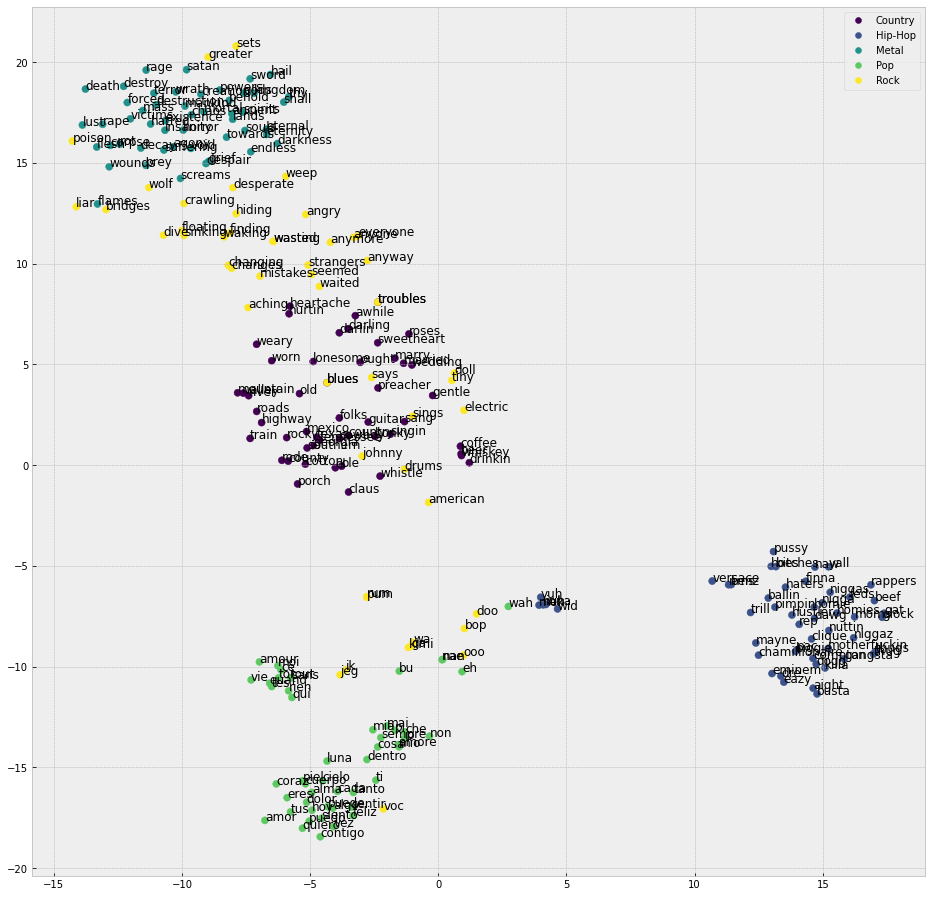

In [ ]:
# Compute tSNE transformation to 2D for all words, based on their word vectors:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

plt.style.use("bmh")

tsne = TSNE(n_components=2)
reduced = tsne.fit_transform(top_word_vectors)
x = reduced[:, 0]
y = reduced[:, 1]
classes = list(df_genre.index)
fig, ax = plt.subplots(figsize=(16, 16))


scatter = ax.scatter(x, y, s=50, c=color)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

for i, txt in enumerate(top_words):  # adding the text
    ax.annotate(txt, (x[i], y[i]), fontsize=12)

Let's reduce the number of neighbours taken in account in the computation to get hopefully a better clustering.

In [ ]:
genres = []
colors = ["black", "blue", "green", "orange", "red"]
lst_top = []
lst_colors = []
for i, gen in enumerate(df_genre.index):
    words, vals = zip(*df_genre[gen])
    lst_top += words
    lst_colors += list(np.repeat([colors[i]], 50))
lst_top_vec = [model[word] for word in lst_top]
Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(
    lst_top_vec
)  # perplexity is a guess about the number of close neighbors each point has

df_sne = pd.DataFrame(
    {
        "x": [x for x in Y[:, 0]],
        "y": [y for y in Y[:, 1]],
        "words": lst_top,
        "color": lst_colors,
    }
)
df_sne

,x,y,words,color
0,1.196443,5.073517,honky,black
1,4.476903,4.351178,tennessee,black
2,-4.307281,6.579764,lonesome,black
3,2.838964,4.697978,cowboy,black
4,-4.718130,9.604123,sweetheart,black
...,...,...,...,...
245,-5.892631,13.715785,says,red
246,-9.541590,17.576622,seemed,red
247,-12.183916,19.771137,changes,red
248,-17.098389,14.979413,angry,red


black
blue
green
orange
red


(-50.479095458984375, 59.93205642700195)

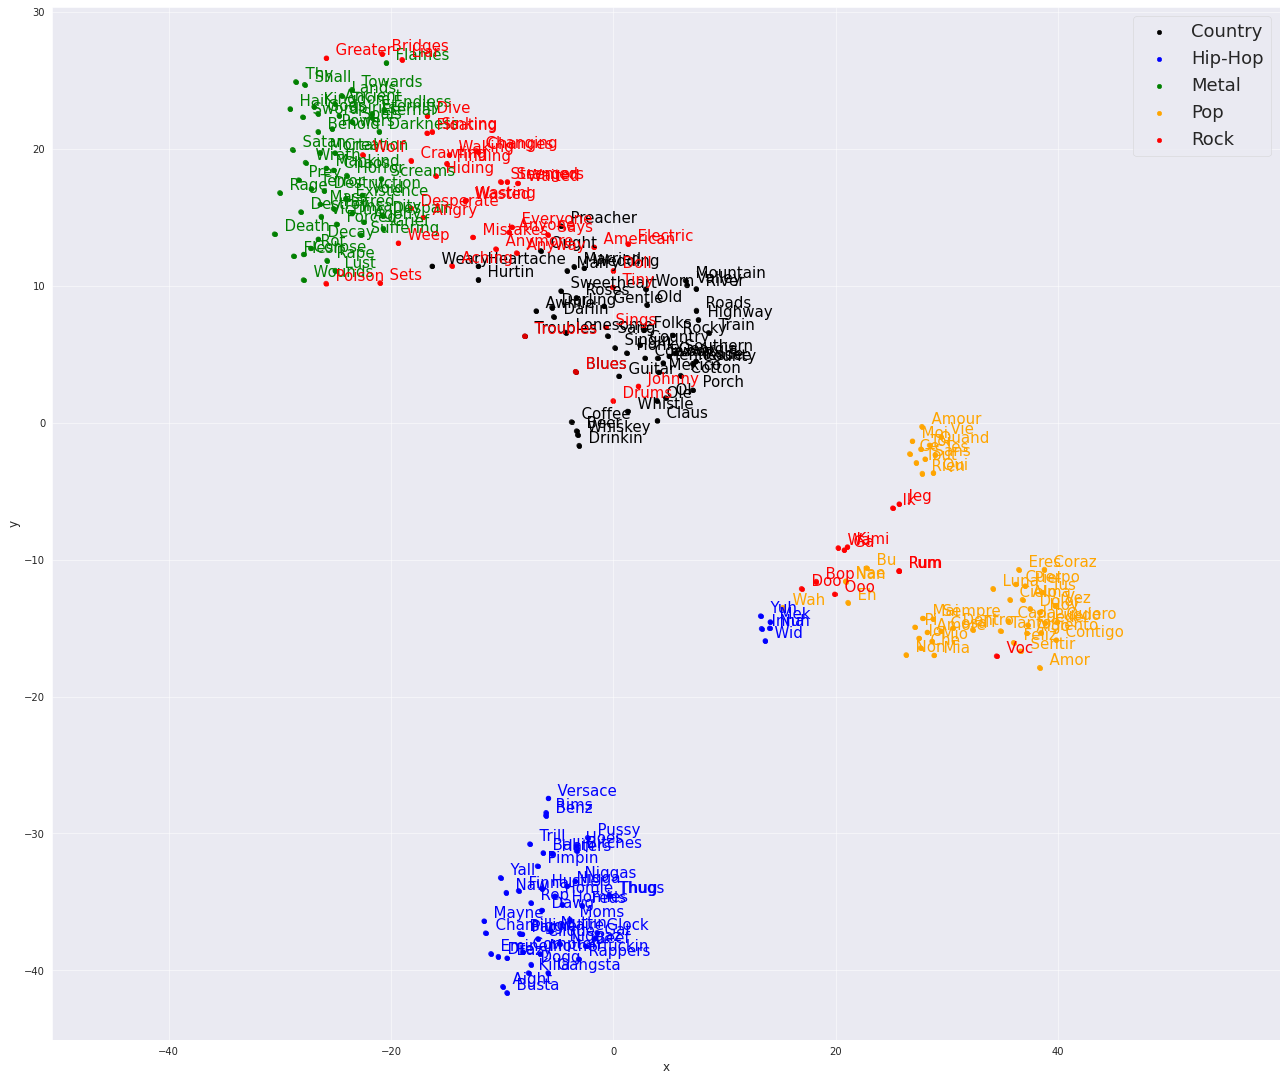

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

sns.set_style("darkgrid")


fig, _ = plt.subplots()
fig.set_size_inches(22, 19)

# Basic plot
p1 = sns.regplot(
    data=df_sne,
    x="x",
    y="y",
    fit_reg=False,
    marker="o",
    scatter_kws={"s": 20, "color": lst_colors},
)  # df_sne['color']})

# Adds annotations one by one with a loop
for line in range(0, df_sne.shape[0]):
    p1.text(
        df_sne["x"][line],
        df_sne["y"][line],
        "  " + df_sne["words"][line].title(),
        horizontalalignment="left",
        verticalalignment="bottom",
        size="medium",
        color=df_sne["color"][line],
        weight="normal",
    ).set_size(15)

j = 0
for i, grp in df_sne.groupby(["color"]):
    print(i)
    grp.plot(
        kind="scatter",
        x="x",
        y="y",
        c=i,
        ax=p1,
        label=df_genre.index.values[j],
        zorder=0,
    )
    j += 1
p1.legend(loc="best", prop=dict(size=18))
plt.xlim(Y[:, 0].min() - 20, Y[:, 0].max() + 20)

WE can see that hip-hop and pop vocabularies us quite unique. The pop genre is reperesented mainly by spanish words - it may be that many of the pop songs belong actually to the latin-pop sub-genre and/or the latin words are more distinctive as they don't appear in other genres. Country and Metal are justifly separated while Rock interlaps with both.

## Text Classification
In this section, you'll build a text classifier, determining the genre of a song based on its lyrics.

### Text classification using Bag-of-Words
Build a Naive Bayes classifier based on the bag of Words.  
You will need to divide your dataset into a train and test sets.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [ ]:
songs = np.array(lyrics_df.clean_lyrics.values)
genre = np.array(lyrics_df.genre.values)

X_train, X_test, y_train, y_test = train_test_split(
    songs, genre, test_size=0.2, random_state=42
)
print("shape of X_train:", X_train.shape)
print("shape of X_test:", X_test.shape)
print("shape of y_train:", y_train.shape)
print("shape of y_test:", y_test.shape)

shape of X_train: (39980,)
shape of X_test: (9996,)
shape of y_train: (39980,)
shape of y_test: (9996,)


In [ ]:
pipe = make_pipeline(CountVectorizer(stop_words="english"), MultinomialNB())
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

Show the confusion matrix.

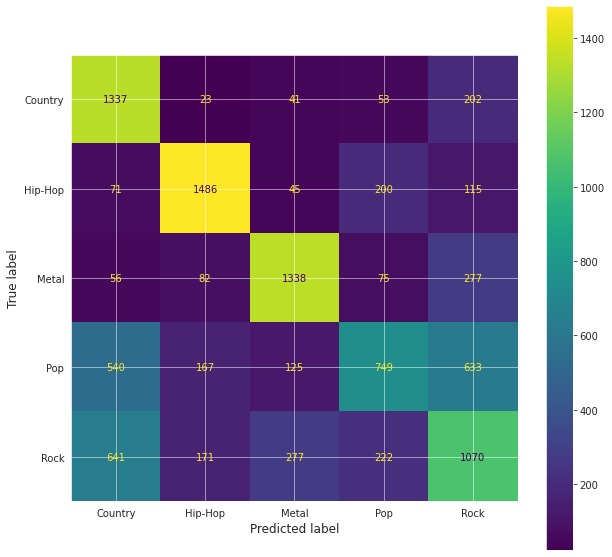

In [ ]:
# confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=pipe.classes_,
)
disp.plot(ax=ax)
plt.show()

Show the classification report - precision, recall, f1 for each class.


In [ ]:
print(classification_report(y_test, y_pred), "\n")

              precision    recall  f1-score   support

     Country       0.51      0.81      0.62      1656
     Hip-Hop       0.77      0.78      0.77      1917
       Metal       0.73      0.73      0.73      1828
         Pop       0.58      0.34      0.43      2214
        Rock       0.47      0.45      0.46      2381

    accuracy                           0.60      9996
   macro avg       0.61      0.62      0.60      9996
weighted avg       0.60      0.60      0.59      9996
 



### Text classification using Word Vectors
#### Average word vectors
Do the same, using a classifier that averages the word vectors of words in the document.

In [ ]:
# get vector for all averegas in vocabulary

appearence_vectorizer = CountVectorizer(vocabulary=model.wv.vocab.keys())
count_train = appearence_vectorizer.fit_transform(
    X_train
)  # count_train(i,j) - i: song, j:word
count_test = appearence_vectorizer.transform(X_test)

average_vector_for_song_train = (count_train @ model.wv.vectors) / (
    count_train.sum(axis=1) + 1
)
average_vector_for_song_test = (count_test @ model.wv.vectors) / (
    count_test.sum(axis=1) + 1
)

In [ ]:
average_vector_for_song_train

matrix([[ 0.00761143,  0.01036307, -0.01162071, ...,  0.00871591,
          0.01696396, -0.00624512],
        [-0.0076978 , -0.0157057 , -0.00381282, ...,  0.00274292,
         -0.00348787,  0.00216295],
        [ 0.01117026, -0.00433303, -0.00415311, ...,  0.00079833,
          0.01454991,  0.00452719],
        ...,
        [ 0.00480261, -0.00171073, -0.0050298 , ..., -0.01072444,
          0.01642571, -0.00213807],
        [ 0.02285957,  0.0148851 ,  0.00319668, ..., -0.00882255,
          0.02131551, -0.00332559],
        [ 0.00159987, -0.02276525,  0.00423887, ...,  0.00093708,
         -0.00756659,  0.00665977]])

LR


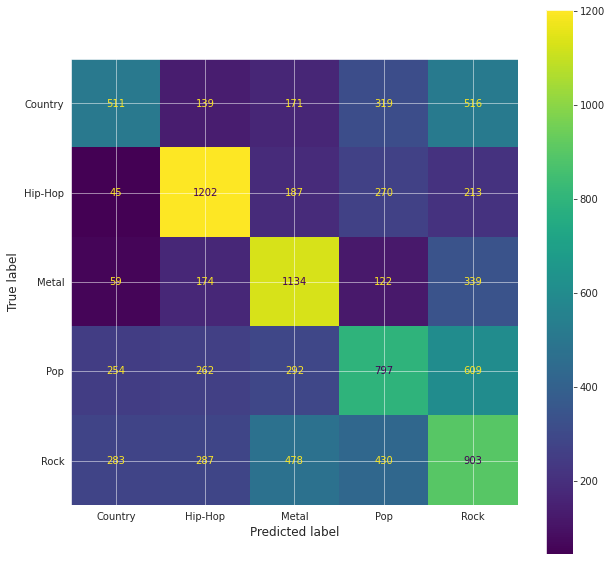

              precision    recall  f1-score   support

     Country       0.44      0.31      0.36      1656
     Hip-Hop       0.58      0.63      0.60      1917
       Metal       0.50      0.62      0.55      1828
         Pop       0.41      0.36      0.38      2214
        Rock       0.35      0.38      0.36      2381

    accuracy                           0.45      9996
   macro avg       0.46      0.46      0.45      9996
weighted avg       0.45      0.45      0.45      9996
 



In [ ]:
clf = LR()  # LogisticRegression
clf.fit(average_vector_for_song_train, y_train)
y_pred = clf.predict(average_vector_for_song_test)

print("LR")
fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=pipe.classes_,
)
disp.plot(ax=ax)
plt.show()
print(classification_report(y_test, y_pred), "\n")

SVM


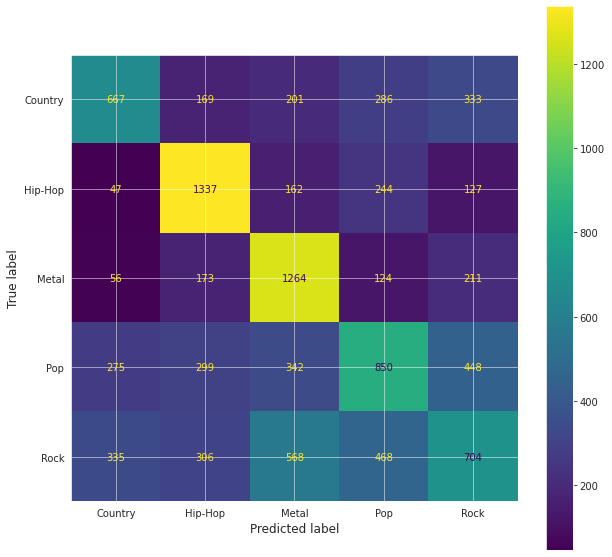

              precision    recall  f1-score   support

     Country       0.48      0.40      0.44      1656
     Hip-Hop       0.59      0.70      0.64      1917
       Metal       0.50      0.69      0.58      1828
         Pop       0.43      0.38      0.41      2214
        Rock       0.39      0.30      0.33      2381

    accuracy                           0.48      9996
   macro avg       0.48      0.49      0.48      9996
weighted avg       0.47      0.48      0.47      9996
 



In [ ]:
clf = LinearSVC()
clf.fit(average_vector_for_song_train, y_train)
y_pred = clf.predict(average_vector_for_song_test)

print("SVM")
fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=pipe.classes_,
)
disp.plot(ax=ax)
plt.show()
print(classification_report(y_test, y_pred), "\n")

#### TfIdf Weighting
Do the same, using a classifier that averages the word vectors of words in the document, weighting each word by its TfIdf.


In [ ]:
tfidf_vectorizer = TfidfVectorizer(vocabulary=model.wv.vocab.keys())
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

average_weighted_tfidf_train = (
    tfidf_train @ model.wv.vectors
)  # weighting each word by its TfId
average_weighted_tfidf_test = tfidf_test @ model.wv.vectors

LR


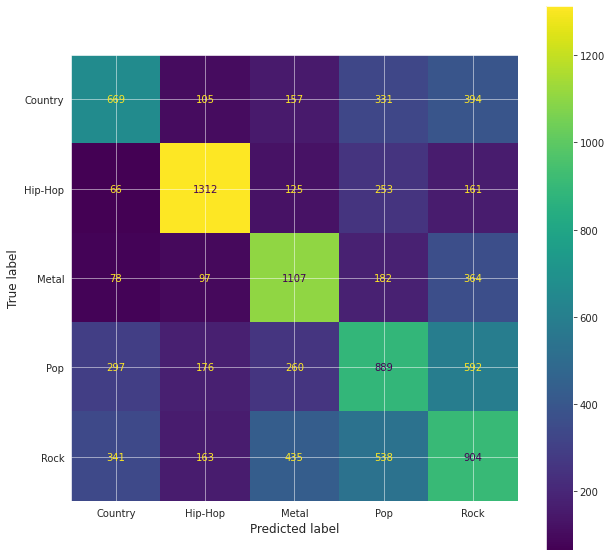

              precision    recall  f1-score   support

     Country       0.46      0.40      0.43      1656
     Hip-Hop       0.71      0.68      0.70      1917
       Metal       0.53      0.61      0.57      1828
         Pop       0.41      0.40      0.40      2214
        Rock       0.37      0.38      0.38      2381

    accuracy                           0.49      9996
   macro avg       0.50      0.50      0.49      9996
weighted avg       0.49      0.49      0.49      9996
 



In [ ]:
clf = LR()
clf.fit(average_weighted_tfidf_train, y_train)
y_pred = clf.predict(average_weighted_tfidf_test)

print("LR")
fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=pipe.classes_,
)
disp.plot(ax=ax)
plt.show()
print(classification_report(y_test, y_pred), "\n")

SVM


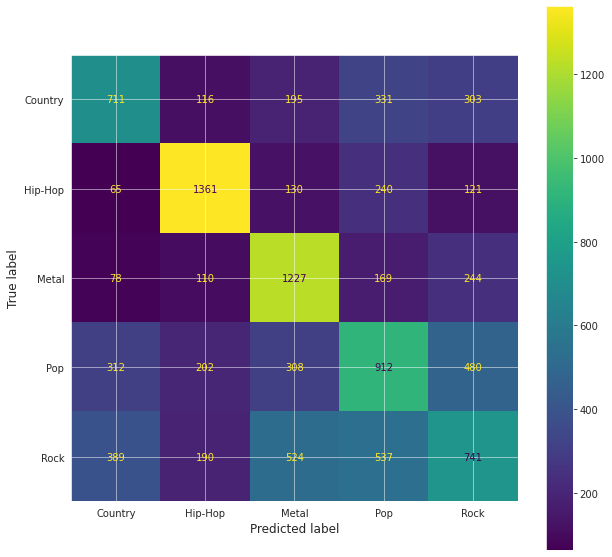

              precision    recall  f1-score   support

     Country       0.46      0.43      0.44      1656
     Hip-Hop       0.69      0.71      0.70      1917
       Metal       0.51      0.67      0.58      1828
         Pop       0.42      0.41      0.41      2214
        Rock       0.39      0.31      0.35      2381

    accuracy                           0.50      9996
   macro avg       0.49      0.51      0.50      9996
weighted avg       0.49      0.50      0.49      9996
 



In [ ]:
clf = LinearSVC()
clf.fit(average_weighted_tfidf_train, y_train)
y_pred = clf.predict(average_weighted_tfidf_test)

print("SVM")
fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=pipe.classes_,
)
disp.plot(ax=ax)
plt.show()
print(classification_report(y_test, y_pred), "\n")

We can see that the results match the T-Sne plot in a way. Hip hop is the easiest to classify as we saw in the plot. Metal is second and also in the plot it was quite homogenous although not so far apart as Hip-Hop. Pop is surprisingly low as in the plot it was really distinctive. It might be because that our second assumption is correct - it was far apart as the latin words are highly distinctive but they are not representing the real pop vocabulary which greatly overlaps with the other genres.Rock and Country are low down the list as we saw in the plot - they were quite spread out (especially Rock) and overlapping.Also the confusion matrix matches the plot as the more frequent confusions correspond to overlapping in the plot (Rock with country and Metal)

### Text classification using ConvNet
Do the same, using a ConvNet.  
The ConvNet should get as input a 2D matrix where each column is an embedding vector of a single word, and words are in order. Use zero padding so that all matrices have a similar length.  
Some songs might be very long. Trim them so you keep a maximum of 128 words (after cleaning stop words and rare words).  
Initialize the embedding layer using the word vectors that you've trained before, but allow them to change during training.  

Extra: Try training the ConvNet with 2 slight modifications:
1. freezing the the weights trained using Word2vec (preventing it from updating)
1. random initialization of the embedding layer

You are encouraged to try this question on your own.  

You might prefer to get ideas from the paper "Convolutional Neural Networks for Sentence Classification" (Kim 2014, [link](https://arxiv.org/abs/1408.5882)).

There are several implementations of the paper code in PyTorch online (see for example [this repo](https://github.com/prakashpandey9/Text-Classification-Pytorch) for a PyTorch implementation of CNN and other architectures for text classification). If you get stuck, they might provide you with a reference for your own code.

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import ShuffleSplit
import numpy as np

New dataset class that does a mapping between words of a song and their indices in the word vectors table. These will be the input later for the embedding layer which is actually does the opposite and retrieve the vectors according to the indices. 

In [ ]:
# Build the dataset:


class DS_songs(Dataset):
    def __init__(self, data, labels, vocab, max_len=128):
        self.data = data
        self.labels = torch.tensor(labels)
        self.vocab = vocab
        self.trim_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.decode(self.data[idx]), self.labels[idx]

    def decode(self, item):
        idx = torch.zeros(self.trim_len, dtype=torch.int)  # requires_grad=True)
        tmp = [self.vocab[word] for word in item if word in self.vocab]
        tmp = tmp[: self.trim_len]
        idx[0 : len(tmp)] = torch.tensor(tmp)
        return idx

In [ ]:
# creates data_sets and data loaders for train and validation

# def prepeare_data(sentences, labels,batch,words_vec, vec_idx):
def prepeare_data(sentences, labels, batch, vec_idx):
    idx, _ = ShuffleSplit(n_splits=2, test_size=0.2, random_state=0).split(
        sentences
    )  # split to train and validation
    train_idx, val_idx = idx
    sent_arr = np.asarray(sentences)

    train_set = DS_songs(sent_arr[train_idx], labels[train_idx], vec_idx)
    train_loader = DataLoader(
        dataset=train_set, batch_size=batch, shuffle=True, num_workers=2
    )  # loads training data into memory, and a DataLoader object fetches data from a Dataset and serves the data up in batches

    val_set = DS_songs(sent_arr[val_idx], labels[val_idx], vec_idx)
    val_loader = DataLoader(
        dataset=val_set, batch_size=batch, shuffle=True, num_workers=2
    )
    return train_set, train_loader, val_set, val_loader


In [ ]:
genres = lyrics_df.genre
genre_to_label = genres.factorize()  # (array([0, 1, 0, ..., 0, 0, 2]), Index(['Pop', 'Hip-Hop', 'Rock', 'Country', 'Metal'], dtype='object'))
labels = genre_to_label[0]  # array([0, 1, 0, ..., 0, 0, 2])
vec_idx0 = {word: i + 1 for i, word in enumerate(model.wv.index2word)}  # word and index
vec_idx0["no such word"] = 0
# words_tensor0=torch.cat((torch.zeros((1,300),dtype=torch.float64), torch.tensor(model.wv.vectors, dtype=torch.float64)))
train_set, train_loader, val_set, val_loader = prepeare_data(
    sentences, labels, 32, vec_idx0
)

In [ ]:
inputs1, labels1 = next(iter(train_loader))
print(inputs1, "\n")
print(labels1)

tensor([[  22, 2553, 1709,  ...,    0,    0,    0],
        [  23,  283, 1094,  ...,    0,    0,    0],
        [ 159,   75,  353,  ...,    0,    0,    0],
        ...,
        [ 196,  742,  533,  ...,    0,    0,    0],
        [ 773,  116,  773,  ...,    0,    0,    0],
        [  71,  884,   81,  ...,   14,  829, 1586]], dtype=torch.int32) 

tensor([2, 4, 0, 2, 2, 3, 1, 0, 2, 2, 1, 0, 3, 3, 4, 4, 2, 0, 0, 1, 2, 1, 4, 1,
        4, 1, 2, 4, 1, 0, 4, 1])


In [ ]:
import random

seed = 2
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [ ]:
class CNN(nn.Module):
    def __init__(
        self,
        batch_size,
        output_size,
        in_channels,
        out_channels,
        kernel_heights,
        stride,
        padding,
        keep_probab,
        vocab_size,
        embedding_length,
        weights,
        frozen=True,
    ):
        super(CNN, self).__init__()
        self.batch_size = batch_size
        self.output_size = output_size
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_heights = kernel_heights
        self.stride = stride
        self.padding = padding
        self.vocab_size = vocab_size
        self.embedding_length = embedding_length
        # @@@
        # self.word_embeddings = weights  # nn.Embedding(vocab_size, embedding_length)

        self.word_embeddings = nn.Embedding(vocab_size, embedding_length, padding_idx=0)
        if not weights is None:
            self.word_embeddings.weight = nn.Parameter(
                weights, requires_grad=not frozen
            )

        self.conv1 = nn.Conv2d(
            in_channels,
            out_channels,
            (kernel_heights[0], embedding_length),
            stride,
            padding[0],
        )
        self.conv2 = nn.Conv2d(
            in_channels,
            out_channels,
            (kernel_heights[1], embedding_length),
            stride,
            padding[1],
        )
        self.conv3 = nn.Conv2d(
            in_channels,
            out_channels,
            (kernel_heights[2], embedding_length),
            stride,
            padding[2],
        )
        self.dropout = nn.Dropout(keep_probab)
        self.label = nn.Linear(len(kernel_heights) * out_channels, output_size)

    def conv_block(self, input, conv_layer):
        conv_out = conv_layer(
            input
        )  # conv_out.size() = (batch_size, out_channels, dim, 1)

        activation = F.relu(conv_out).squeeze(
            3
        )  # activation.size() = (batch_size, out_channels, dim)
        max_out = F.max_pool1d(activation, activation.size()[2]).squeeze(
            2
        )  # maxpool_out.size() = (batch_size, out_channels)

        return max_out

    def forward(self, input_idx, batch_size=None):
        input_idx = input_idx.to(device).long()
        input = self.word_embeddings(input_idx)
        # input.size() = (batch_size, num_seq, embedding_length)
        input = input.unsqueeze(1)
        # input.size() = (batch_size, 1, num_seq, embedding_length)
        # print(input.shape)
        max_out1 = self.conv_block(input, self.conv1)
        max_out2 = self.conv_block(input, self.conv2)
        max_out3 = self.conv_block(input, self.conv3)

        all_out = torch.cat((max_out1, max_out2, max_out3), 1)
        # all_out.size() = (batch_size, num_kernels*out_channels)
        fc_in = self.dropout(all_out)
        # fc_in.size()) = (batch_size, num_kernels*out_channels)
        logits = self.label(fc_in)

        return logits

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
import os
import time
from torch.autograd import Variable
import torch.optim as optim
import numpy as np


# TEXT, vocab_size, word_embeddings, train_iter, valid_iter, test_iter = load_data.load_dataset()


def clip_gradient(model, clip_value):
    params = list(filter(lambda p: p.grad is not None, model.parameters()))
    for p in params:
        p.grad.data.clamp_(-clip_value, clip_value)


def train_model(model, train_loaders, epoch):
    total_epoch_loss = 0
    total_epoch_acc = 0
    if torch.cuda.is_available():
        model.cuda()
    optim = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()))
    steps = 0
    model.train()
    for inputs, targets in train_loaders:
        targets = torch.autograd.Variable(targets).long()
        if torch.cuda.is_available():
            inputs = inputs.cuda()
            targets = targets.cuda()
        # if (inputs.size()[0] is not 32):# One of the batch returned by BucketIterator has length different than 32.
        #     continue
        optim.zero_grad()
        prediction = model(inputs)
        # print(prediction)
        loss = loss_fn(prediction, targets)
        num_corrects = (
            (torch.max(prediction, 1)[1].view(targets.size()).data == targets.data)
            .float()
            .sum()
        )
        acc = 100.0 * num_corrects / targets.shape[0]

        loss.backward()
        clip_gradient(model, 1e-1)
        optim.step()
        steps += 1

        # if steps % 100 == 0:
        # print (f'Epoch: {epoch+1}\n')
        # print(f'Training Loss: {loss.item():.4f}, Training Accuracy: {acc.item(): .2f}%')

        total_epoch_loss += loss.item()
        total_epoch_acc += acc.item()

    return total_epoch_loss / len(train_loader), total_epoch_acc / len(train_loader)


def eval_model(model, val_loaders):
    total_epoch_loss = 0
    total_epoch_acc = 0
    model.eval()
    with torch.no_grad():
        for inputs, targets in val_loaders:
            # if (text.size()[0] is not 32):
            #   continue
            targets = torch.autograd.Variable(targets).long()
            if torch.cuda.is_available():
                inputs = inputs.cuda()
                targets = targets.cuda()
            prediction = model(inputs)
            loss = loss_fn(prediction, targets)
            # print(torch.max(prediction, 1), targets.data)
            num_corrects = (
                torch.max(prediction, 1)[1].view(targets.size()).data == targets.data
            ).sum()
            # print(num_corrects)
            acc = 100.0 * num_corrects / targets.shape[0]
            total_epoch_loss += loss.item()
            total_epoch_acc += acc.item()

    return total_epoch_loss / len(val_loaders), total_epoch_acc / len(val_loaders)


We used the kernel heights suggested in the article - running filters on 3, 4, or 5 words (rows) together. We tried different paddings - maintaining the input dimension implies applying the filter at the borders on less words than intended so we skipped it for the 4 and 5-words kernels (it also didn't make much difference in results)

In [ ]:
words_tensor0 = torch.cat(
    (
        torch.zeros((1, 300), dtype=torch.float64),
        torch.tensor(model.wv.vectors, dtype=torch.float64),
    )
)

learning_rate = 2e-1  # 2e-5
batch_size = 32
output_size = 5  # num of genres

in_channels = 1
out_channels = 100
kernel_heights = [3, 4, 5]
stride = (1, 1)
padding = [(1, 0), (0, 0), (0, 0)]
embedding_length = 300
keep_probab = 0.5
words_tensor_backup = words_tensor0.clone().detach()
loss_fn = nn.CrossEntropyLoss()  # F.cross_entropy
vocab_size = len(model.wv.index2word) + 1  # @@@@@
num_epochs = 10

In [ ]:
from torchsummary import summary

word_embeddings = None
frozen = False
model_cnn = CNN(
    batch_size,
    output_size,
    in_channels,
    out_channels,
    kernel_heights,
    stride,
    padding,
    keep_probab,
    vocab_size,
    embedding_length,
    word_embeddings,
    frozen,
)

summary(model_cnn.to(device), [[128]])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         Embedding-1             [-1, 128, 300]       3,433,500
            Conv2d-2          [-1, 100, 128, 1]          90,100
            Conv2d-3          [-1, 100, 125, 1]         120,100
            Conv2d-4          [-1, 100, 124, 1]         150,100
           Dropout-5                  [-1, 300]               0
            Linear-6                    [-1, 5]           1,505
Total params: 3,795,305
Trainable params: 3,795,305
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.58
Params size (MB): 14.48
Estimated Total Size (MB): 15.06
----------------------------------------------------------------


In [ ]:
word_embeddings = words_tensor0  # torch.tensor(model.wv.vectors, dtype=torch.float64)
# frozen=True by default
model_cnn = CNN(
    batch_size,
    output_size,
    in_channels,
    out_channels,
    kernel_heights,
    stride,
    padding,
    keep_probab,
    vocab_size,
    embedding_length,
    word_embeddings,
)

model_cnn = model_cnn.float()
for epoch in range(num_epochs):
    train_loss, train_acc = train_model(model_cnn, train_loader, epoch)
    val_loss, val_acc = eval_model(model_cnn, val_loader)

    print(
        f"Epoch: {epoch + 1:02}, Train Loss: {train_loss:.3f}, Train Acc: {train_acc:.2f}%, Val. Loss: {val_loss:3f}, Val. Acc: {val_acc:.2f}%"
    )


Epoch: 01, Train Loss: 1.065, Train Acc: 56.48%, Val. Loss: 0.964982, Val. Acc: 61.38%
Epoch: 02, Train Loss: 0.963, Train Acc: 61.20%, Val. Loss: 0.942585, Val. Acc: 62.21%
Epoch: 03, Train Loss: 0.918, Train Acc: 63.07%, Val. Loss: 0.919081, Val. Acc: 63.76%
Epoch: 04, Train Loss: 0.878, Train Acc: 65.00%, Val. Loss: 0.918482, Val. Acc: 63.99%
Epoch: 05, Train Loss: 0.840, Train Acc: 66.63%, Val. Loss: 0.912032, Val. Acc: 63.70%
Epoch: 06, Train Loss: 0.804, Train Acc: 68.65%, Val. Loss: 0.914306, Val. Acc: 64.16%
Epoch: 07, Train Loss: 0.763, Train Acc: 70.36%, Val. Loss: 0.912588, Val. Acc: 64.41%
Epoch: 08, Train Loss: 0.729, Train Acc: 72.05%, Val. Loss: 0.917045, Val. Acc: 64.38%
Epoch: 09, Train Loss: 0.689, Train Acc: 73.68%, Val. Loss: 0.928915, Val. Acc: 63.66%
Epoch: 10, Train Loss: 0.655, Train Acc: 75.02%, Val. Loss: 0.930332, Val. Acc: 64.34%


Nice results comparing to the previous classifiers. It seems that on the last epoch the model started to overfit as train loss and score continued to imrprove but validation loss strarted to increase

Let's try to un-freeze our pre-trained word vectors and allow them to change by back propagation

In [ ]:
# word_embeddings=words_tensor_backup# for freash starttorch.tensor(model.wv.vectors, dtype=torch.float64)
frozen = False
model_cnn = CNN(
    batch_size,
    output_size,
    in_channels,
    out_channels,
    kernel_heights,
    stride,
    padding,
    keep_probab,
    vocab_size,
    embedding_length,
    word_embeddings,
    frozen,
)

model_cnn = model_cnn.float()
for epoch in range(num_epochs):
    # print(train_set.embeddings[0,0:50])
    train_loss, train_acc = train_model(model_cnn, train_loader, epoch)
    val_loss, val_acc = eval_model(model_cnn, val_loader)

    print(
        f"Epoch: {epoch + 1:02}, Train Loss: {train_loss:.3f}, Train Acc: {train_acc:.2f}%, Val. Loss: {val_loss:3f}, Val. Acc: {val_acc:.2f}%"
    )

Epoch: 01, Train Loss: 1.034, Train Acc: 57.78%, Val. Loss: 0.951137, Val. Acc: 62.44%
Epoch: 02, Train Loss: 0.836, Train Acc: 67.34%, Val. Loss: 0.944332, Val. Acc: 62.93%
Epoch: 03, Train Loss: 0.690, Train Acc: 73.91%, Val. Loss: 1.030933, Val. Acc: 62.40%
Epoch: 04, Train Loss: 0.559, Train Acc: 79.29%, Val. Loss: 1.130880, Val. Acc: 62.11%
Epoch: 05, Train Loss: 0.436, Train Acc: 84.01%, Val. Loss: 1.336271, Val. Acc: 61.17%
Epoch: 06, Train Loss: 0.334, Train Acc: 88.18%, Val. Loss: 1.632176, Val. Acc: 60.73%
Epoch: 07, Train Loss: 0.264, Train Acc: 90.86%, Val. Loss: 1.873824, Val. Acc: 60.43%
Epoch: 08, Train Loss: 0.207, Train Acc: 92.77%, Val. Loss: 2.205351, Val. Acc: 60.18%
Epoch: 09, Train Loss: 0.185, Train Acc: 93.90%, Val. Loss: 2.553931, Val. Acc: 59.52%
Epoch: 10, Train Loss: 0.157, Train Acc: 94.84%, Val. Loss: 2.776225, Val. Acc: 59.38%


We got pretty close score to the one we got before but within only one epoch. After that the model continued to learn as we got 94% train accuracy but also to overfit (val loss only increasing). Over-fitting occured nuch faster than before as in one epoch actually the weights were updated many times.

Now let's try randomly initialized weights.

In [ ]:
word_embeddings = (
    None  # words_tensor0#torch.tensor(model.wv.vectors, dtype=torch.float64)
)
learning_rate = 2e-5
num_epochs = 10
frozen = False
model_cnn = CNN(
    batch_size,
    output_size,
    in_channels,
    out_channels,
    kernel_heights,
    stride,
    padding,
    keep_probab,
    vocab_size,
    embedding_length,
    word_embeddings,
    frozen,
)

model_cnn = model_cnn.float()
for epoch in range(num_epochs):
    # print(train_set.embeddings[0,0:50])
    train_loss, train_acc = train_model(model_cnn, train_loader, epoch)
    val_loss, val_acc = eval_model(model_cnn, val_loader)

    print(
        f"Epoch: {epoch + 1:02}, Train Loss: {train_loss:.3f}, Train Acc: {train_acc:.2f}%, Val. Loss: {val_loss:3f}, Val. Acc: {val_acc:.2f}%"
    )

Epoch: 01, Train Loss: 1.342, Train Acc: 44.76%, Val. Loss: 1.052276, Val. Acc: 57.21%
Epoch: 02, Train Loss: 1.155, Train Acc: 53.09%, Val. Loss: 0.993428, Val. Acc: 60.15%
Epoch: 03, Train Loss: 1.019, Train Acc: 59.39%, Val. Loss: 0.998925, Val. Acc: 60.52%
Epoch: 04, Train Loss: 0.901, Train Acc: 65.24%, Val. Loss: 1.017599, Val. Acc: 61.04%
Epoch: 05, Train Loss: 0.783, Train Acc: 70.24%, Val. Loss: 1.111931, Val. Acc: 59.50%
Epoch: 06, Train Loss: 0.676, Train Acc: 74.92%, Val. Loss: 1.222226, Val. Acc: 59.62%
Epoch: 07, Train Loss: 0.584, Train Acc: 78.68%, Val. Loss: 1.378884, Val. Acc: 60.00%
Epoch: 08, Train Loss: 0.507, Train Acc: 81.80%, Val. Loss: 1.486876, Val. Acc: 58.86%
Epoch: 09, Train Loss: 0.465, Train Acc: 83.59%, Val. Loss: 1.661955, Val. Acc: 59.82%
Epoch: 10, Train Loss: 0.414, Train Acc: 85.58%, Val. Loss: 1.787934, Val. Acc: 59.18%


Using randomly initialized vectors we got lower score but not by much. Again we got over-fitting from epoch 6 and on.